In [3]:
import torch
import matplotlib.pyplot as plt

/Users/drishtantregmi/.matplotlib is not a writable directory
Matplotlib created a temporary cache directory at /var/folders/7q/3svq8hl116b_s3yfsq6z1_2m0000gn/T/matplotlib-zmn_1t4l because there was an issue with the default path (/Users/drishtantregmi/.matplotlib); it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
Matplotlib is building the font cache; this may take a moment.


In [4]:
# ---------------------------
# 1️⃣ Create synthetic dataset
# ---------------------------
torch.manual_seed(42)  # reproducibility
N = 1000
x = torch.rand(N, 1) * 10  # x in [0,10]
epsilon = torch.randn(N, 1) * 0.5  # noise
y = 3 * x + 2 + epsilon

In [6]:
# ---------------------------
# 2️⃣ Version A: nn.Linear + SGD
# ---------------------------
model = torch.nn.Linear(1, 1)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

losses_module = []

for step in range(200):
    optimizer.zero_grad()
    y_pred = model(x)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    losses_module.append(loss.item())

In [7]:
# ---------------------------
# 3️⃣ Version B: Manual parameters + raw tensors
# ---------------------------
w = torch.randn(1, 1, requires_grad=True)
b = torch.randn(1, requires_grad=True)
lr = 0.01
losses_manual = []

for step in range(200):
    y_pred = x @ w + b  # matrix multiplication
    loss = ((y_pred - y) ** 2).mean()
    loss.backward()
    
    with torch.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad
        w.grad.zero_()
        b.grad.zero_()
    
    losses_manual.append(loss.item())

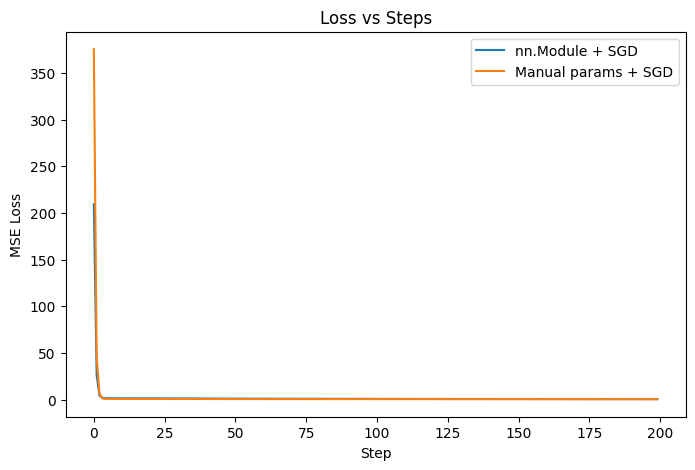

In [8]:
# ---------------------------
# 4️⃣ Plot loss curves
# ---------------------------
plt.figure(figsize=(8,5))
plt.plot(losses_module, label="nn.Module + SGD")
plt.plot(losses_manual, label="Manual params + SGD")
plt.xlabel("Step")
plt.ylabel("MSE Loss")
plt.title("Loss vs Steps")
plt.legend()
plt.show()

In [9]:
# ---------------------------
# 5️⃣ Print learned parameters
# ---------------------------
print("Module learned:", model.weight.item(), model.bias.item())
print("Manual learned:", w.item(), b.item())

Module learned: 3.113950252532959 1.2392828464508057
Manual learned: 3.0681979656219482 1.5385760068893433
